In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 140)


df = pd.read_csv('cleaned_ebay_deals.csv')


df.head()


,timestamp,Title,price,Original_Price,Shipping_Info,URL,discount_percentage
0,2025-11-01 05:24:03,Apple iPhone 15 Pro Max A2849 1TB Natural Unlo...,747.47,747.47,Shipping info unavailable,https://www.ebay.com/itm/357492955429?_trkparm...,0.00
1,2025-11-01 05:24:04,Samsung Galaxy S24+ 256GB S926U Unlocked - Ope...,418.99,999.99,Shipping info unavailable,https://www.ebay.com/itm/257131323419?_trkparm...,58.10
2,2025-11-01 05:24:14,Sony SRSXV800 XSeries Wireless Portable Blueto...,385.99,648.00,Shipping info unavailable,https://www.ebay.com/itm/375588258429?_trkparm...,40.43
3,2025-11-01 05:24:15,"MSI MPG 321CURX QD-OLED 32"" UHD Curved Gaming ...",739.99,1099.99,Shipping info unavailable,https://www.ebay.com/itm/256999901262?_trkparm...,32.73
4,2025-11-01 05:24:25,Apple iPhone 16 A3081 T-Mobile Only 128GB Blac...,409.99,409.99,Shipping info unavailable,https://www.ebay.com/itm/176880660923?_trkparm...,0.00


/tmp/ipython-input-264299347.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  s1 = pd.to_datetime(series, errors='coerce', infer_datetime_format=True, dayfirst=False)


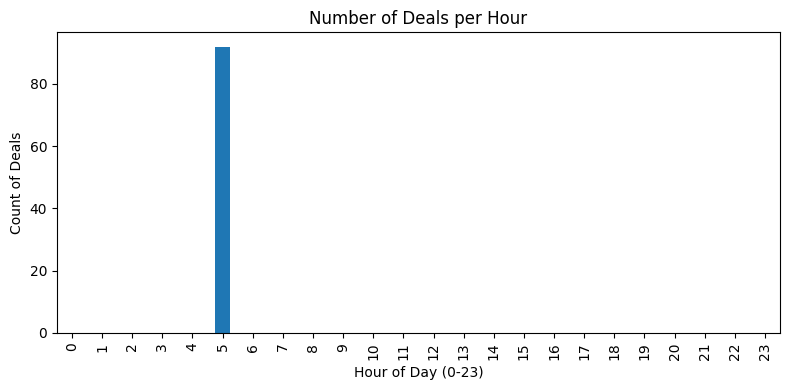

,count
hour,
0,0
1,0
2,0
3,0
4,0
5,92
6,0
7,0
8,0


In [10]:
def parse_timestamp(series):
    s1 = pd.to_datetime(series, errors='coerce', infer_datetime_format=True, dayfirst=False)
    if s1.isna().mean() > 0.5:
        s1 = pd.to_datetime(series, errors='coerce', infer_datetime_format=True, dayfirst=True)
    return s1

df['timestamp_dt'] = parse_timestamp(df['timestamp'])
df = df.sort_values('timestamp_dt').reset_index(drop=True)

df['hour'] = df['timestamp_dt'].dt.hour
deals_per_hour = df.groupby('hour', dropna=False).size().reindex(range(24), fill_value=0)

plt.figure(figsize=(8,4))
deals_per_hour.plot(kind='bar')
plt.title('Number of Deals per Hour')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Count of Deals')
plt.tight_layout()
plt.show()

deals_per_hour.to_frame('count').head(24)


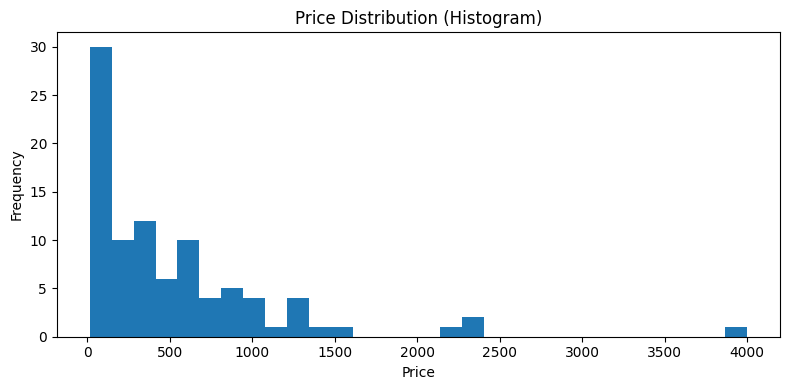

/tmp/ipython-input-962226848.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df['price'].dropna(), vert=True, labels=['price'])


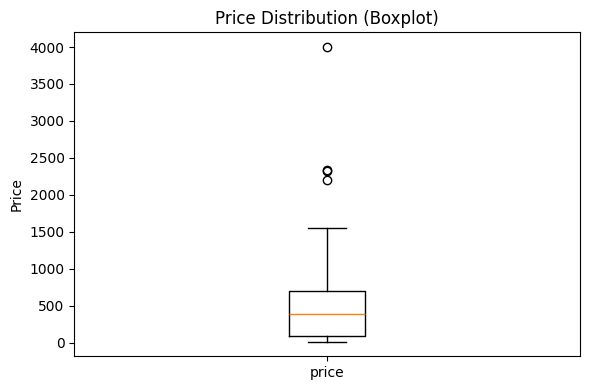

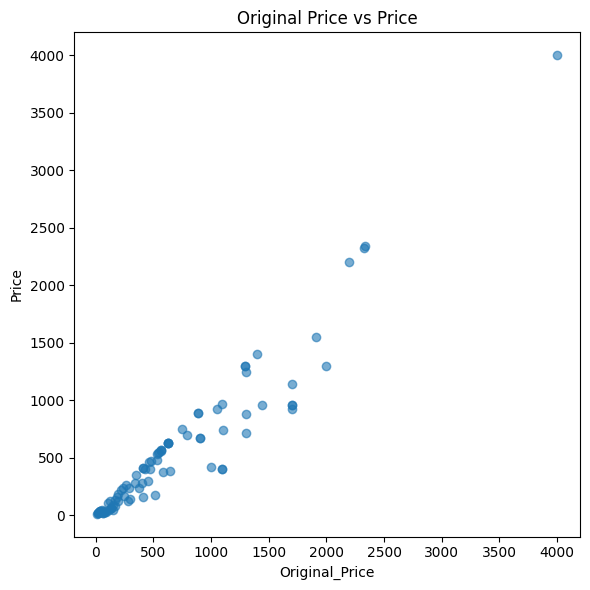

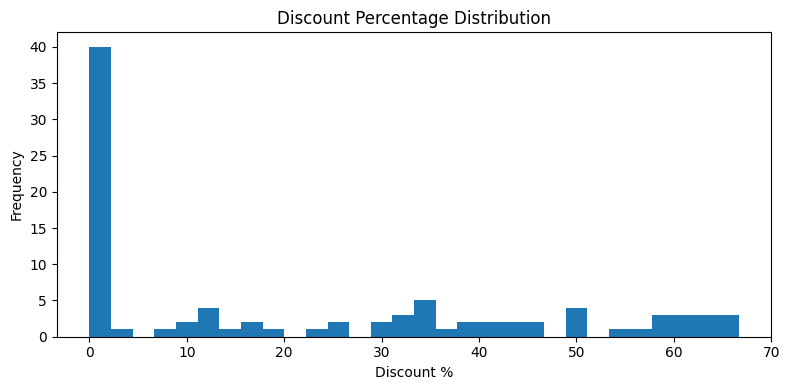

In [11]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['Original_Price'] = pd.to_numeric(df['Original_Price'], errors='coerce')
df['discount_percentage'] = pd.to_numeric(df.get('discount_percentage'), errors='coerce')

plt.figure(figsize=(8,4))
df['price'].dropna().plot(kind='hist', bins=30)
plt.title('Price Distribution (Histogram)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
plt.boxplot(df['price'].dropna(), vert=True, labels=['price'])
plt.title('Price Distribution (Boxplot)')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,6))
plt.scatter(df['Original_Price'], df['price'], alpha=0.6)
plt.title('Original Price vs Price')
plt.xlabel('Original_Price')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,4))
df['discount_percentage'].dropna().plot(kind='hist', bins=30)
plt.title('Discount Percentage Distribution')
plt.xlabel('Discount %')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


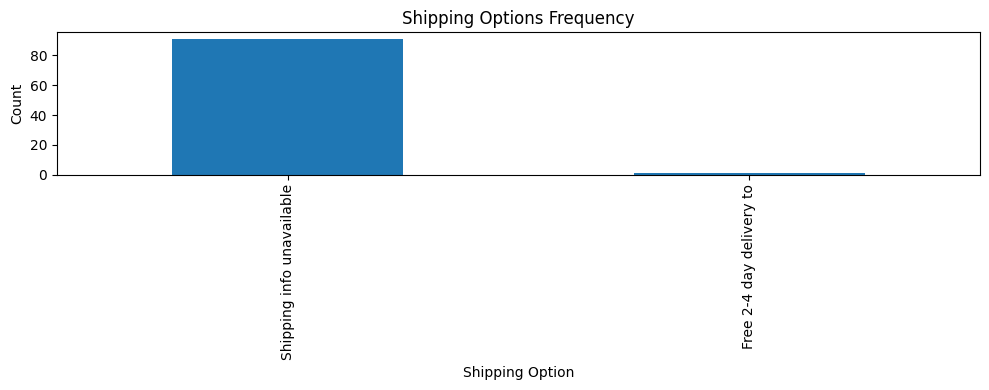

,count
Shipping_Info,
Shipping info unavailable,91
Free 2-4 day delivery to,1


In [12]:
ship = df['Shipping_Info'].fillna('Shipping info unavailable').astype(str).str.strip()
ship = ship.replace({'': 'Shipping info unavailable'})

shipping_counts = ship.value_counts(dropna=False)

plt.figure(figsize=(10,4))
shipping_counts.plot(kind='bar')
plt.title('Shipping Options Frequency')
plt.xlabel('Shipping Option')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

shipping_counts.to_frame('count').head(20)


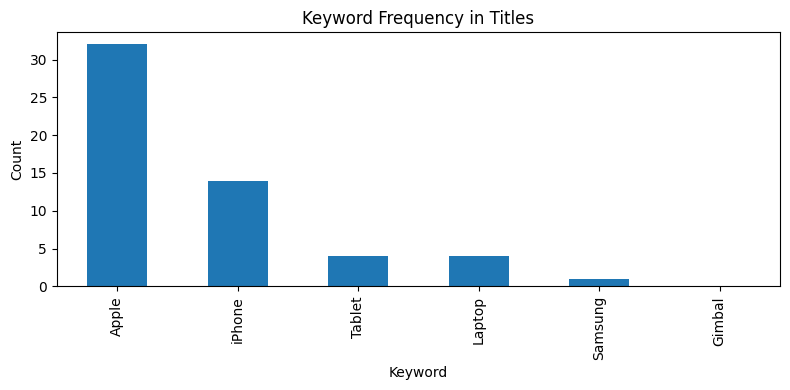

,count
Apple,32
iPhone,14
Tablet,4
Laptop,4
Samsung,1
Gimbal,0


In [13]:
keywords = ["Apple", "Samsung", "Laptop", "iPhone", "Tablet", "Gimbal"]

titles = df['Title'].fillna('').astype(str)

kw_counts = {kw: titles.str.contains(kw, case=False, na=False).sum() for kw in keywords}
kw_series = pd.Series(kw_counts).sort_values(ascending=False)

plt.figure(figsize=(8,4))
kw_series.plot(kind='bar')
plt.title('Keyword Frequency in Titles')
plt.xlabel('Keyword')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

kw_series.to_frame('count')


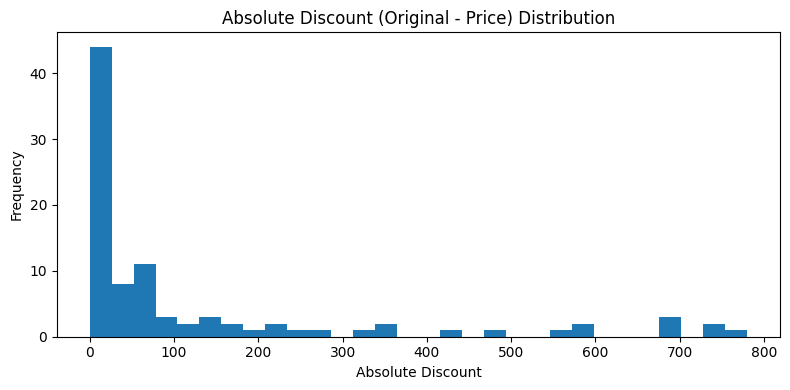

,Title,Original_Price,price,absolute_discount
0,Apple iPhone 15 Pro Max A2849 1TB Natural Unlo...,747.47,747.47,0.00
1,Samsung Galaxy S24+ 256GB S926U Unlocked - Ope...,999.99,418.99,581.00
2,Sony SRSXV800 XSeries Wireless Portable Blueto...,648.00,385.99,262.01
3,"MSI MPG 321CURX QD-OLED 32"" UHD Curved Gaming ...",1099.99,739.99,360.00
4,Apple iPhone 16 A3081 T-Mobile Only 128GB Blac...,409.99,409.99,0.00
5,JBL PartyBox Club 120 Portable Bluetooth Speak...,399.95,280.00,119.95
6,Apple iPad 7th Gen - 32GB - Wi-Fi Only - Very ...,105.00,105.00,0.00
7,A+ GRADE Dell XPS 15 9570 Precision 5530 FHD L...,57.49,49.99,7.50
8,Apple iPhone 15 Pro Max A2849 256GB Unlocked V...,624.99,624.99,0.00
9,Apple iPhone 15 A2846 128GB Unlocked Very Good...,411.99,411.99,0.00


In [14]:
df['absolute_discount'] = (df['Original_Price'] - df['price']).where(
    df['Original_Price'].notna() & df['price'].notna(),
    np.nan
)

plt.figure(figsize=(8,4))
df['absolute_discount'].dropna().plot(kind='hist', bins=30)
plt.title('Absolute Discount (Original - Price) Distribution')
plt.xlabel('Absolute Discount')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

df[['Title', 'Original_Price', 'price', 'absolute_discount']].head(10)


In [15]:
top5 = df.sort_values('discount_percentage', ascending=False).head(5)
top5[['timestamp', 'Title', 'Original_Price', 'price', 'discount_percentage', 'Shipping_Info', 'URL']]


,timestamp,Title,Original_Price,price,discount_percentage,Shipping_Info,URL
56,2025-11-01 05:28:02,Soundcore Liberty 4 SE True Wireless Earbuds H...,149.99,49.99,66.67,Shipping info unavailable,https://www.ebay.com/itm/385693088002?_trkparm...
69,2025-11-01 05:29:01,Sigma MC-11 Lens Mount Converter (Sigma SA/EOS...,510.95,178.61,65.04,Shipping info unavailable,https://www.ebay.com/itm/286197283832?_trkparm...
77,2025-11-01 05:29:27,Vera Bradley Women's Outlet Ultralight Laptop ...,119.00,41.70,64.96,Shipping info unavailable,https://www.ebay.com/itm/365930191290?_trkparm...
14,2025-11-01 05:25:03,Apple iPhone 14 Pro A2650 (Fully Unlocked) 128...,1099.00,405.99,63.06,Shipping info unavailable,https://www.ebay.com/itm/286883274280?_trkparm...
85,2025-11-01 05:29:53,Apple iPhone 14 Pro A2650 (Fully Unlocked) 128...,1099.00,405.99,63.06,Shipping info unavailable,https://www.ebay.com/itm/286883274280?_trkparm...
